# Pandas 学习笔记

* 版本号： 0.2
* 创建时间： 2015年02月07日 星期六 10:26:33 CST
* 修改时间： 2018年03月01日
* 数据来源：
 * movies.csv http://boxofficemojo.com/daily/
 * iris.csv https://github.com/dsaber/py-viz-blog
 * titanic.csv https://github.com/dsaber/py-viz-blog
 * ts.csv https://github.com/dsaber/py-viz-blog

## 安装使用

2018年更新:

ipython notebook 已更名为 jupyter notebook 。安装使用方法如下：
* 安装 anaconda ，anaconda 是一个 Python 发行版。装好后就已经包含 ``pandas`` 和 ``jupyter notebook`` 。
* 运行 ``jupyter notebook`` 命令就可以使用 jupyter notebook 。
* 要在 notebook 即时显示图表，可以使用在 notebook 中使用 ``%matplotlib inline`` 命令。

下面是以前的安装使用方法：

* 安装 pandas
```shell
    sudo apt-get install build-essential python-dev
    sudo apt-get install python-pandas python-tk
    sudo apt-get install python-scipy python-matplotlib python-tables
    sudo apt-get install python-numexpr python-xlrd python-statsmodels
    sudo apt-get install python-openpyxl python-xlwt python-bs4
```    
    if use virtualenv before install matplotlib should install libpng-dev, libjpeg8-dev, libfreetype6-dev

* 安装 ipython-notebook
```shell
    sudo pip install "ipython[notebook]"
    sudo pip install pygments
```
* 使用``ipython notebook``运行 ipython-notebook 。如果使用matplotlib内嵌进网页中,那么需要运行:``ipython notebook --matplotlib inline`` 。

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
# 查看 pandas 的版本
pd.__version__

'0.25.3'

## 创建对象

### Series

In [4]:
s = pd.Series([1,3,5,np.nan,6,8]);s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### DataFrames

In [5]:
dates = pd.date_range('20180101', periods=6);dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'));df

,A,B,C,D
2018-01-01,-0.639446,1.058071,0.057871,-1.024174
2018-01-02,-0.231658,-0.628640,2.216041,-1.493322
2018-01-03,1.594231,0.320276,-0.525247,-1.063389
2018-01-04,-1.264606,-1.818144,-0.273554,0.162315
2018-01-05,0.232716,-0.294688,-0.836876,1.161109
2018-01-06,-1.069807,1.599004,0.516191,-0.854737


In [7]:
# 可以使用字典来创建 DataFrame 。
# 如果字典的 Value 是单一值，那么会自动扩展。
# 如果字典的 Value 是列表或者 Series ，那么长度要保持一致。
# 如果字典中只有一个值有 Index ，那么会使用这个 Index 作为整个 DataFrame 的 Index 。
# 如果字典有多个 Index ，那么必须保持一致，否则会报错。
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(2,6)),dtype='float32'), 
      'D' : np.array([3] * 4,dtype='int32'), 
      'E' : pd.Categorical(["test","train","test","train"]), 
      'F' : 'foo' }
)
df2

,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo
4,1.0,2013-01-02,1.0,3,test,foo
5,1.0,2013-01-02,1.0,3,train,foo


## 查看数据

In [8]:
# 对象类型
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [9]:
# 查看头部数据
df.head()

,A,B,C,D
2018-01-01,-0.639446,1.058071,0.057871,-1.024174
2018-01-02,-0.231658,-0.628640,2.216041,-1.493322
2018-01-03,1.594231,0.320276,-0.525247,-1.063389
2018-01-04,-1.264606,-1.818144,-0.273554,0.162315
2018-01-05,0.232716,-0.294688,-0.836876,1.161109


In [10]:
# 查看尾部数据
df.tail(2)
#head 和 tail 接受一个整数参数，缺省值为 5 。

,A,B,C,D
2018-01-05,0.232716,-0.294688,-0.836876,1.161109
2018-01-06,-1.069807,1.599004,0.516191,-0.854737


In [11]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [13]:
df.values

array([[-0.63944563,  1.05807109,  0.05787072, -1.02417397],
       [-0.23165838, -0.62863984,  2.21604101, -1.49332208],
       [ 1.59423131,  0.32027558, -0.52524674, -1.0633892 ],
       [-1.26460646, -1.81814356, -0.27355391,  0.1623146 ],
       [ 0.23271581, -0.2946884 , -0.83687599,  1.16110883],
       [-1.06980715,  1.59900382,  0.51619076, -0.85473735]])

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.229762,0.039313,0.192404,-0.518700
std,1.047403,1.229415,1.096321,0.990004
min,-1.264606,-1.818144,-0.836876,-1.493322
25%,-0.962217,-0.545152,-0.462324,-1.053585
50%,-0.435552,0.012794,-0.107842,-0.939456
75%,0.116622,0.873622,0.401611,-0.091948
max,1.594231,1.599004,2.216041,1.161109


In [15]:
df.T

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06
A,-0.639446,-0.231658,1.594231,-1.264606,0.232716,-1.069807
B,1.058071,-0.628640,0.320276,-1.818144,-0.294688,1.599004
C,0.057871,2.216041,-0.525247,-0.273554,-0.836876,0.516191
D,-1.024174,-1.493322,-1.063389,0.162315,1.161109,-0.854737


## 读入数据

### 从  CSV 文件读入数据

In [16]:
# 读入 CSV 格式数据
df_movies = pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,"$26,168,351",American Sniper,"$9,905,616"
1,2,Jan. 31,Sat,31,"$41,633,588",American Sniper,"$16,510,536"
2,3,Feb. 1,Sun,32,"$12,515,579",American Sniper,"$4,244,376"
3,4,Feb. 2,Mon,33,"$6,475,068",American Sniper,"$2,645,109"
4,5,Feb. 3,Tue,34,"$7,825,091",American Sniper,"$2,923,141"


In [17]:
df_movies = pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8',thousands=',',escapechar='$')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


### 从数据库读入数据
参见：http://stackoverflow.com/questions/10065051/python-pandas-and-databases-like-mysql

### 从 Excel 文件读入数据

## 原型

```python
pandas.read_excel(io, sheet_name=0, header=0, skiprows=None, skip_footer=0,
                  index_col=None, names=None, usecols=None, parse_dates=False,
                  date_parser=None, na_values=None, thousands=None,
                  convert_float=True, converters=None, dtype=None,
                  true_values=None, false_values=None, engine=None,
                  squeeze=False, **kwds)
```
Read an Excel table into a pandas DataFrame

## Parameters

* io : string, path object (pathlib.Path or py._path.local.LocalPath),
    file-like object, pandas ExcelFile, or xlrd workbook. The string could be a URL. Valid
    URL schemes include http, ftp, s3, and file. For file URLs, a host is expected. For
    instance, a local file could be file://localhost/path/to/workbook.xlsx

* sheet_name : string, int, mixed list of strings/ints, or None, default 0
    Strings are used for sheet names, Integers are used in zero-indexed sheet positions.
    Lists of strings/integers are used to request multiple sheets.
    Specify None to get all sheets.
    str|int -> DataFrame is returned.
    list|None -> Dict of DataFrames is returned, with keys representing sheets.
    Available Cases
    • Defaults to 0 -> 1st sheet as a DataFrame
    • 1 -> 2nd sheet as a DataFrame
    • “Sheet1” -> 1st sheet as a DataFrame
    • [0,1,”Sheet5”] -> 1st, 2nd & 5th sheet as a dictionary of DataFrames
    • None -> All sheets as a dictionary of DataFrames

* sheetname : string, int, mixed list of strings/ints, or None, default 0
    Deprecated since version 0.21.0: Use sheet_name instead

* header : int, list of ints, default 0
    Row (0-indexed) to use for the column labels of the parsed DataFrame. If a list of
    integers is passed those row positions will be combined into a MultiIndex. Use
    None if there is no header.

* skiprows : list-like
    Rows to skip at the beginning (0-indexed)

* skip_footer : int, default 0
    Rows at the end to skip (0-indexed)

* index_col : int, list of ints, default None
    Column (0-indexed) to use as the row labels of the DataFrame. Pass None if there is no
    such column. If a list is passed, those columns will be combined into a MultiIndex.
    If a subset of data is selected with usecols, index_col is based on the subset.

* names : array-like, default None
    List of column names to use. If file contains no header row, then you should explicitly pass header=None

* converters : dict, default None
    Dict of functions for converting values in certain columns. Keys can either be integers or column labels, values are functions that take one input argument, the Excel cell content, and return the transformed content.

* dtype : Type name or dict of column -> type, default None
    Data type for data or columns. E.g. {‘a’: np.float64, ‘b’: np.int32}
    Use object to preserve data as stored in Excel and not interpret dtype.
    If converters are specified, they will be applied INSTEAD of dtype conversion.
    New in version 0.20.0.

* true_values : list, default None
    Values to consider as True
    New in version 0.19.0.

* false_values : list, default None
    Values to consider as False
    New in version 0.19.0.

* parse_cols : int or list, default None
    Deprecated since version 0.21.0: Pass in usecols instead.

* usecols : int or list, default None
    • If None then parse all columns,
    • If int then indicates last column to be parsed
    • If list of ints then indicates list of column numbers to be parsed
    • If string then indicates comma separated list of Excel column letters and column ranges (e.g.
    “A:E” or “A,C,E:F”). Ranges are inclusive of both sides.

* squeeze : boolean, default False
    If the parsed data only contains one column then return a Series

* na_values : scalar, str, list-like, or dict, default None
    Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA
    values. By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’,
    ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’,
    ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.

* thousands : str, default None
    Thousands separator for parsing string columns to numeric. Note that this parameter
    is only necessary for columns stored as TEXT in Excel, any numeric columns will
    automatically be parsed, regardless of display format.

* keep_default_na : bool, default True
    If na_values are specified and keep_default_na is False the default NaN values are over-ridden, otherwise they’re appended to.

* verbose : boolean, default False
    Indicate number of NA values placed in non-numeric columns

* engine: string, default None
    If io is not a buffer or path, this must be set to identify io.
    Acceptable values are None or xlrd

* convert_float : boolean, default True
    convert integral floats to int (i.e., 1.0 –> 1). If False, all numeric
    data will be read in as floats: Excel stores all numbers as floats
    internally

## Returns parsed : DataFrame or Dict of DataFrames

DataFrame from the passed in Excel file. See notes in sheet_name argument for more
information on when a Dict of Dataframes is returned.


## 复制数据

In [18]:
df = df_movies.copy()
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376


## 选择数据

In [19]:
#显示开头的数据，缺省显示 5 条
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [20]:
#显示开头的数据，指定显示 3 条
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376


In [21]:
#显示末尾的数据，缺省显示 5 条
df.tail()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
24,25,Feb. 23,Mon,54,7385671,Fifty Shades of Grey,1846390
25,26,Feb. 24,Tue,55,9424126,Fifty Shades of Grey,2265910
26,27,Feb. 25,Wed,56,6862942,Fifty Shades of Grey,1772230
27,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
28,29,Feb. 27,Fri,58,26457000,Focus (2015),6465000


In [22]:
#显示末尾的数据，缺省显示 2 条
df.tail(2)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
27,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
28,29,Feb. 27,Fri,58,26457000,Focus (2015),6465000


In [23]:
#只显示指定的行和列
df.iloc[[1,3,5],[0,1,2,3]]

,Row,Date,Day,Day#
1,2,Jan. 31,Sat,31
3,4,Feb. 2,Mon,33
5,6,Feb. 4,Wed,35


In [24]:
df.loc[[1,3,5],['Date', 'Gross']]

,Date,Gross
1,Jan. 31,16510536
3,Feb. 2,2645109
5,Feb. 4,2273342


## 操作单元

In [25]:
df = df_movies.copy()
# 单元格赋值
# 单个单元格赋值
df.iloc[0, 6] = u'土豆之歌'
df.loc[df.index[1], u'Gross']= 999
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,土豆之歌
1,2,Jan. 31,Sat,31,41633588,American Sniper,999
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376


In [26]:
# 多单个单元格赋值
df.loc[df.index[0:2], u'Gross'] = [100, 200]
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,100
1,2,Jan. 31,Sat,31,41633588,American Sniper,200
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376


## 操作列

### 改变列头

#### 使用 columns 属性

In [27]:
df = df_movies.copy()
#用一个列表来显式地指定，列表长度必须与列数一致
# 示例 1
df.columns = [u'Row', u'Date', u'WeekDay', u'Day', u'Top10Gross', u'No1Moive', u'Gross']
df.head()

,Row,Date,WeekDay,Day,Top10Gross,No1Moive,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [28]:
# 示例 2 ：大写转小写
df.columns = [c.lower() for c in df.columns]
df.head()

,row,date,weekday,day,top10gross,no1moive,gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


#### 使用 rename 方法

In [29]:
# 示例 1 ：小写转大写
df = df.rename(columns=lambda x: x.upper())
df.tail(3)

,ROW,DATE,WEEKDAY,DAY,TOP10GROSS,NO1MOIVE,GROSS
26,27,Feb. 25,Wed,56,6862942,Fifty Shades of Grey,1772230
27,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
28,29,Feb. 27,Fri,58,26457000,Focus (2015),6465000


In [30]:
# 示例 2 ：改变特定的列头
df = df.rename(columns={'DATE': u'日期', 'GROSS': u'票房'})
df.head()

,ROW,日期,WEEKDAY,DAY,TOP10GROSS,NO1MOIVE,票房
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


### 打印列类型

In [31]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['ROW', 'DAY', 'TOP10GROSS', '票房'], dtype='object'),
 dtype('O'): Index(['日期', 'WEEKDAY', 'NO1MOIVE'], dtype='object')}

In [32]:
# 打印列类型(清晰打印中文)
types = df.columns.to_series().groupby(df.dtypes).groups
for key, value in types.items():
    print(key,':\t', ','.join(value))

int64 :	 ROW,DAY,TOP10GROSS,票房
object :	 日期,WEEKDAY,NO1MOIVE


### 插入列

In [33]:
df = df_movies.copy()
# 方式一：在末尾添加
df['memo'] = pd.Series('', index=df.index)
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,memo
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,


In [34]:
# 方式二：在中间插入
df = df_movies.copy()
df.insert(loc=1, column=u'year', value=u'2015')
df.head(3)

,Row,year,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,2015,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,2015,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,2015,Feb. 1,Sun,32,12515579,American Sniper,4244376


In [35]:
# 根据现有值生成一个新的列
df = df_movies.copy()
df.insert(loc = 5 , column=u'OtherGross', value=df[u'Top 10 Gross'] - df[u'Gross'])
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,OtherGross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,16262735,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,25123052,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,8271203,American Sniper,4244376


In [36]:
# 根据现有值生成多个新的列
df = df_movies.copy()
def process_date_col(text):
    #根据日期生成月份和日两个新的列
    if pd.isnull(text):
        month = day = np.nan
    else:
        month, day = text.split('.')
    return pd.Series([month, day])

df[[u'month', u'day']] = df.Date.apply(process_date_col)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,month,day
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,Jan,30
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,Jan,31
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,Feb,1
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,Feb,2
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,Feb,3


### 改变列值

In [37]:
df = df_movies.copy()
#根据一列的值改变另一列
df[u'#1 Movie'] = df[u'#1 Movie'].apply(lambda x: x[::-1])
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,repinS naciremA,9905616
1,2,Jan. 31,Sat,31,41633588,repinS naciremA,16510536
2,3,Feb. 1,Sun,32,12515579,repinS naciremA,4244376


In [38]:
# 同时改变多个列的值
cols = [u'Gross', u'Top 10 Gross']
df[cols] = df[cols].applymap(lambda x: x/10000)
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,2616.8351,repinS naciremA,990.5616
1,2,Jan. 31,Sat,31,4163.3588,repinS naciremA,1651.0536
2,3,Feb. 1,Sun,32,1251.5579,repinS naciremA,424.4376


## 操作行

In [39]:
df = df_movies.copy()
# 添加一个空行
df = df.append(pd.Series(
                [np.nan]*len(df.columns), # Fill cells with NaNs
                index=df.columns),
                ignore_index=True)
df.tail(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
27,28.0,Feb. 26,Thu,57.0,7161773.0,Fifty Shades of Grey,1790520.0
28,29.0,Feb. 27,Fri,58.0,26457000.0,Focus (2015),6465000.0
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 空值处理（NaN）

In [40]:
# 计数有空值的行
nans = df.shape[0] - df.dropna().shape[0]
print(u'一共有 %d 行出现空值' % nans)

# 填充空值为`无`
df.fillna(value=u'无', inplace=True)
df.tail()

一共有 1 行出现空值


,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
25,26,Feb. 24,Tue,55,9.42413e+06,Fifty Shades of Grey,2.26591e+06
26,27,Feb. 25,Wed,56,6.86294e+06,Fifty Shades of Grey,1.77223e+06
27,28,Feb. 26,Thu,57,7.16177e+06,Fifty Shades of Grey,1.79052e+06
28,29,Feb. 27,Fri,58,2.6457e+07,Focus (2015),6.465e+06
29,无,无,无,无,无,无,无


## 排序

In [41]:
df = df_movies.copy()
# 添加一个空行
df = df.append(pd.Series(
                [np.nan]*len(df.columns), # Fill cells with NaNs
                index=df.columns),
                ignore_index=True)
# 根据某一列排序（由低到高）
df.sort_values(u'Gross', ascending=True, inplace=True)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
12,13.0,Feb. 11,Wed,42.0,6138013.0,American Sniper,1468160.0
13,14.0,Feb. 12,Thu,43.0,5969515.0,SpongeBob,1527552.0
26,27.0,Feb. 25,Wed,56.0,6862942.0,Fifty Shades of Grey,1772230.0
27,28.0,Feb. 26,Thu,57.0,7161773.0,Fifty Shades of Grey,1790520.0
24,25.0,Feb. 23,Mon,54.0,7385671.0,Fifty Shades of Grey,1846390.0


In [42]:
# 排序后重新编制索引
df.index = range(1,len(df.index)+1)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
1,13.0,Feb. 11,Wed,42.0,6138013.0,American Sniper,1468160.0
2,14.0,Feb. 12,Thu,43.0,5969515.0,SpongeBob,1527552.0
3,27.0,Feb. 25,Wed,56.0,6862942.0,Fifty Shades of Grey,1772230.0
4,28.0,Feb. 26,Thu,57.0,7161773.0,Fifty Shades of Grey,1790520.0
5,25.0,Feb. 23,Mon,54.0,7385671.0,Fifty Shades of Grey,1846390.0


## 过滤

In [43]:
df = df_movies.copy()
# 根据列类型过滤
# 只选择字符串型的列
df.loc[:, (df.dtypes == np.dtype('O')).values].head()

,Date,Day,#1 Movie
0,Jan. 30,Fri,American Sniper
1,Jan. 31,Sat,American Sniper
2,Feb. 1,Sun,American Sniper
3,Feb. 2,Mon,American Sniper
4,Feb. 3,Tue,American Sniper


In [44]:
# 选择 artifact 为空值的行
df.iloc[0, 6] = np.nan
df.iloc[3, 6] = np.nan
df[df[u'Gross'].isnull()].head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,NaN
3,4,Feb. 2,Mon,33,6475068,American Sniper,NaN


In [45]:
# 选择'Gross'为非空值的行
df[df[u'Gross'].notnull()].head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536.0
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376.0
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141.0
5,6,Feb. 4,Wed,35,5819529,American Sniper,2273342.0
6,7,Feb. 5,Thu,36,6165344,American Sniper,2506106.0


In [46]:
# 根据条件过滤
df[ (df[u'Day'] == u'Sat') | (df[u'Day#'] <= 32) ]

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,NaN
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536.0
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376.0
8,9,Feb. 7,Sat,38,59153298,SpongeBob,24086968.0
15,16,Feb. 14,Sat,45,87900659,Fifty Shades of Grey,36752460.0
22,23,Feb. 21,Sat,52,43708356,Fifty Shades of Grey,8991100.0


In [47]:
df[ (df[u'Day'] == u'Sat') & (df[u'Day#'] <= 32) ]

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536.0


## 切片

取交集：print(pd.merge(df1,df2,on=['name', 'age', 'sex']))
取并集：print(pd.merge(df1,df2,on=['name', 'age', 'sex'], how='outer'))
取差集(从df1中过滤df1在df2中存在的行)：

df1 = df1.append(df2)
df1 = df1.append(df2)
df1 = df1.drop_duplicates(subset=['name', 'age', 'sex'],keep=False)

## 合并

In [59]:
# 横向合并
df_a = df.filter(regex='D', axis=1);
print(df_a.head())
print('============================')
df_b = df.filter(regex='ss', axis=1);
print(df_b.head())
print('============================')
df_c = pd.concat([df_a, df_b],axis=1)
print(df_c.head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


## 统计：计数，平均，最大，最小，方差，标准差

## 同比，环比

## 图形化

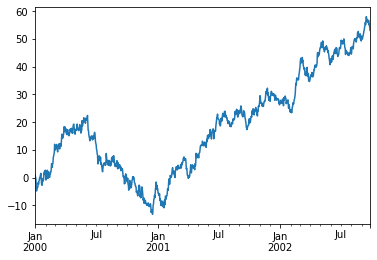

In [49]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [50]:
df = df_movies.copy()
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


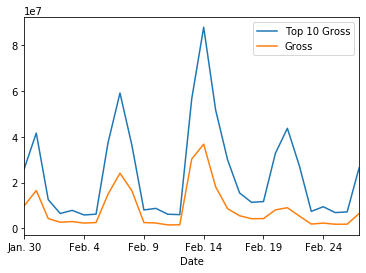

In [51]:
df.plot(x='Date', y=['Top 10 Gross', 'Gross'])

## 使用另一个 DataFrame 来更新数据

In [52]:
df_1 = df_movies.copy()
df_2 = pd.DataFrame({u'#1 Movie':[u'American Sniper',
                            u'SpongeBob',
                            u'Fifty Shades of Grey'],
                            u'chs':[u'美国阻击手',
                                    u'海绵宝宝',
                                    u'五十度灰']})
df_1.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [53]:
df_2.head()

,#1 Movie,chs
0,American Sniper,美国阻击手
1,SpongeBob,海绵宝宝
2,Fifty Shades of Grey,五十度灰


In [54]:
pd.merge(df_1, df_2, on=u'#1 Movie').head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,chs
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,美国阻击手
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,美国阻击手
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,美国阻击手
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,美国阻击手
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,美国阻击手


## 导出数据

In [55]:
# 导出周六的数据，格式为 CSV
# df[ (df['Day'] == 'Sat') ].to_csv('test_tmp.csv', mode='w', encoding='utf-8', index=False)

#在前面的文件中追加周日的数据
# df[ (df['Day'] == 'Sun') ].to_csv('test_output.csv', mode='a', header=False, encoding='utf-8', index=False)

In [56]:
# 输出为 dict 格式
# DataFrame.to_dict可以接受 ‘dict’, ‘list’, ‘series’, ‘split’, ‘records’, ‘index’
df = pd.DataFrame({'AAA' : [4,5,6,7], 'ABB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,ABB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [57]:
df.to_dict('records')

[{'AAA': 4, 'ABB': 10, 'CCC': 100},
 {'AAA': 5, 'ABB': 20, 'CCC': 50},
 {'AAA': 6, 'ABB': 30, 'CCC': -30},
 {'AAA': 7, 'ABB': 40, 'CCC': -50}]

In [58]:
# 过滤包含指定字符的列
df_A = df.filter(regex='A', axis=1); df_A

,AAA,ABB
0,4,10
1,5,20
2,6,30
3,7,40
